In [45]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from Utils import prim_dens
from sklearn.model_selection import train_test_split
import pandas as pd
import gzip
import random
from sklearn.preprocessing import MinMaxScaler

#http://www.sfu.ca/~ssurjano/oakoh04.html
def calculate_y_oakley_ohagan2004(xx):
    a1 = np.array([0.0118, 0.0456, 0.2297, 0.0393, 0.1177, 0.3865, 0.3897, 0.6061,
                  0.6159, 0.4005, 1.0741, 1.1474, 0.7880, 1.1242, 1.1982])
    a2 = np.array([0.4341, 0.0887, 0.0512, 0.3233, 0.1489, 1.0360, 0.9892, 0.9672,
                  0.8977, 0.8083, 1.8426, 2.4712, 2.3946, 2.0045, 2.2621])
    a3 = np.array([0.1044, 0.2057, 0.0774, 0.2730, 0.1253, 0.7526, 0.8570, 1.0331,
                  0.8388, 0.7970, 2.2145, 2.0382, 2.4004, 2.0541, 1.9845])

    matrix = np.array([[-0.022482886,  -0.18501666,  0.13418263,   0.36867264,   0.17172785,   0.13651143,  -0.44034404, -0.081422854,   0.71321025,  -0.44361072,   0.50383394, -0.024101458, -0.045939684,   0.21666181,  0.055887417],
           [0.25659630,  0.053792287,  0.25800381,   0.23795905,  -0.59125756, -0.081627077,  -0.28749073,   0.41581639,   0.49752241,  0.083893165,  -0.11056683,  0.033222351,  -0.13979497, -0.031020556,  -0.22318721],
         [-0.055999811,   0.19542252, 0.095529005,  -0.28626530,  -0.14441303,   0.22369356,   0.14527412,   0.28998481,   0.23105010,  -0.31929879,  -0.29039128,  -0.20956898,   0.43139047,  0.024429152,  0.044904409],
           [0.66448103,   0.43069872,  0.29924645,  -0.16202441,  -0.31479544,  -0.39026802,   0.17679822,  0.057952663,   0.17230342,   0.13466011,  -0.35275240,   0.25146896, -0.018810529,   0.36482392,  -0.32504618],
          [-0.12127800,   0.12463327,  0.10656519,  0.046562296,  -0.21678617,   0.19492172, -0.065521126,  0.024404669, -0.096828860,   0.19366196,   0.33354757,   0.31295994, -0.083615456,  -0.25342082,   0.37325717],
          [-0.28376230,  -0.32820154, -0.10496068,  -0.22073452,  -0.13708154,  -0.14426375,  -0.11503319,   0.22424151, -0.030395022,  -0.51505615,  0.017254978,  0.038957118,   0.36069184,   0.30902452,  0.050030193],
         [-0.077875893, 0.0037456560,  0.88685604,  -0.26590028, -0.079325357, -0.042734919,  -0.18653782,  -0.35604718,  -0.17497421,  0.088699956,   0.40025886, -0.055979693,   0.13724479,   0.21485613, -0.011265799],
         [-0.092294730,   0.59209563, 0.031338285, -0.033080861,  -0.24308858, -0.099798547,  0.034460195,  0.095119813,  -0.33801620, 0.0063860024,  -0.61207299,  0.081325416,   0.88683114,   0.14254905,   0.14776204],
          [-0.13189434,   0.52878496,  0.12652391,  0.045113625,   0.58373514,   0.37291503,   0.11395325,  -0.29479222,  -0.57014085,   0.46291592, -0.094050179,   0.13959097,  -0.38607402,  -0.44897060,  -0.14602419],
          [0.058107658,  -0.32289338, 0.093139162,  0.072427234,  -0.56919401,   0.52554237,   0.23656926, -0.011782016,  0.071820601,  0.078277291,  -0.13355752,   0.22722721,   0.14369455,  -0.45198935,  -0.55574794],
           [0.66145875,   0.34633299,  0.14098019,   0.51882591,  -0.28019898,  -0.16032260, -0.068413337,  -0.20428242,  0.069672173,   0.23112577, -0.044368579,  -0.16455425,   0.21620977, 0.0042702105, -0.087399014],
           [0.31599556, -0.027551859,  0.13434254,   0.13497371,  0.054005680,  -0.17374789,   0.17525393,  0.060258929,  -0.17914162,  -0.31056619,  -0.25358691,  0.025847535,  -0.43006001,  -0.62266361, -0.033996882],
          [-0.29038151,  0.034101270, 0.034903413,  -0.12121764,  0.026030714,  -0.33546274,  -0.41424111,  0.053248380,  -0.27099455, -0.026251302,   0.41024137,   0.26636349,   0.15582891,  -0.18666254,  0.019895831],
          [-0.24388652,  -0.44098852, 0.012618825,   0.24945112,  0.071101888,   0.24623792,   0.17484502, 0.0085286769,   0.25147070,  -0.14659862, -0.084625150,   0.36931333,  -0.29955293,   0.11044360,  -0.75690139],
          [0.041494323,  -0.25980564,  0.46402128,  -0.36112127,  -0.94980789,  -0.16504063, 0.0030943325,  0.052792942,   0.22523648,   0.38390366,   0.45562427,  -0.18631744, 0.0082333995,   0.16670803,   0.16045688]])
    matrix = np.reshape(matrix, (15, 15), order='F')  # Reshape M to a 15x15 matrix in Fortran order

    term1 = np.dot(a1, xx)
    term2 = np.dot(a2, np.sin(xx))
    term3 = np.dot(a3, np.cos(xx))
    term4 = np.dot(xx.T, np.dot(matrix, xx))

    y = term1 + term2 + term3 + term4
    
    return y.item()

In [56]:
def calculate_y_ackley(x, a=20, b=0.2, c=2 * np.pi):
    d = len(x)
    
    sum1 = np.sum(np.power(x, 2))
    sum2 = np.sum(np.cos(c * x))
    
    term1 = -a * np.exp(-b * np.sqrt(sum1 / d))
    term2 = -np.exp(sum2 / d)
    
    y = term1 + term2 + a + np.exp(1)
    
    return y.item()

In [58]:
def calculate_y_griewank(x):
    i = np.arange(1, len(x) + 1)
    sum_value = np.sum(np.power(x, 2) / 4000)
    prod = np.prod(np.cos(x / np.sqrt(i)))
    
    y = sum_value - prod + 1
    return y

In [46]:
def calculate_precision_test_data(lims, x_test, y_test):

    is_within_limits = True
    
    # Iterate over each row of temp_data
    # Initialize TP, FP, TN, FN counters
    tp = 0
    fp = 0
    tn = 0
    fn = 0


    # Assuming x_test is a 2D NumPy array and y_test is a 1D NumPy array
    for row_index in range(x_test.shape[0]):
        for col_index in range(x_test.shape[1]):
            element = x_test[row_index, col_index]

            # Check if the element is within the limits for the current column
            is_within_limits = (lims.iloc[0, col_index] <= element <= lims.iloc[1, col_index]) and is_within_limits # Calculate column index
            
        if is_within_limits & (y_test[row_index] == 1):
            tp = tp + 1
        if is_within_limits & (y_test[row_index] == 0):
            fp = fp + 1
        if is_within_limits & (y_test[row_index] == 0):
            tn = tn + 1
        if is_within_limits & (y_test[row_index] == 1):
            fn = fn + 1
        is_within_limits = True
            
                
    if (tp == 0):
        return 0
    else:
        return tp/(tp + fp)

In [51]:
def create_plot_generated_data(function_string, dimension_max):    
    pts = [50, 100, 200, 400, 800, 1600, 3200, 6400]  # number of points to experiment with
    atrs = [5, 10, 15]  # number of dimensions to experiment with
    res_train = np.empty((len(pts), len(atrs)))  # matrix with the results
    res_train[:] = np.nan
    res_test = np.empty((len(pts), len(atrs)))  # matrix with the results
    res_test[:] = np.nan
    y_test = []
    k = 1

    x_test = np.random.rand(500, dimension_max)
    x_test  = pd.DataFrame(x_test)
    for index, row in x_test.iterrows():
        y_test.append(function_string(row))

    min_value = np.min(y_test)
    max_value = np.max(y_test)
    y_test = (y_test - min_value) / (max_value - min_value)
    y_test = np.where(y_test > 0.5, 1, 0)

    for n in range(len(pts)):
        for m in range(len(atrs)):
            prec_train = []
            prec_test = []
            for i in range(50):  # for each dataset size (n rows, m columns) do five experiments and average the results
                y = []
                sys.stdout.write('\r' + 'experiment' + ' ' + str(k) + '/' + str(len(pts)*len(atrs)))
                x = np.random.rand(pts[n], dimension_max)
                x  = pd.DataFrame(x)
            
                for index, row in x.iterrows():
                    y.append(function_string(row))

                min_value = np.min(y)
                max_value = np.max(y)
                y = (y - min_value) / (max_value - min_value)
                y = np.where(y > 0.5, 1, 0)
            
                num_columns_to_select = atrs[m]

                # Select random columns
                selected_columns = random.sample(list(x.columns), num_columns_to_select)
                x = x[selected_columns]
            
                x_test_temp = x_test[selected_columns]
            
                prim_alg = prim_dens.PRIMdens(x.values, y, alpha=0.1)
                prim_alg.fit()
                precisions = prim_alg.get_precisions()
                if len(precisions) <= 0:
                    prec_train.append(0)
                else:
                    prec_train.append(precisions[len(precisions)-1])
                boxes = prim_alg.get_boxes()
                if len(boxes) <= 0:
                    prec_test.append(0)
                else:
                    box = boxes[len(boxes) - 1]
                    box = pd.DataFrame(box)
                    prec_test.append(calculate_precision_test_data(box, x_test_temp.values, y_test))           
        
            res_train[n, m] = np.mean(prec_train)
            res_test[n, m] = np.mean(prec_test)
            k = k + 1

    plt.imshow(res_train-res_test, cmap='hot')
    plt.yticks(np.arange(len(pts)), pts)
    plt.xticks(np.arange(len(atrs)), atrs)
    plt.colorbar()
    plt.show()

experiment 24/24

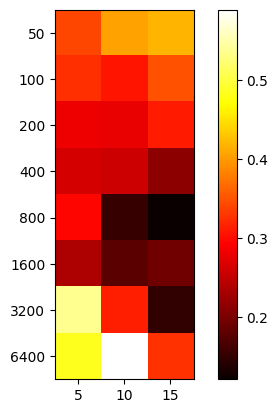

In [52]:
create_plot_generated_data(calculate_y_oakley_ohagan2004, 15)

experiment 24/24

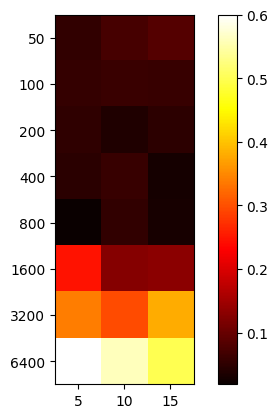

In [57]:
create_plot_generated_data(calculate_y_ackley, 15)

experiment 24/24

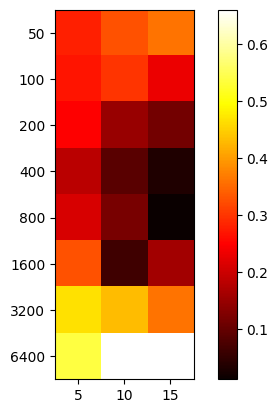

In [60]:
create_plot_generated_data(calculate_y_griewank, 15)

In [9]:
# Path to the Susy dataset .zip file
gz_file_path = '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/Data/SUSY.csv.gz'

# Open the Gzip-compressed CSV file
with gzip.open(gz_file_path, 'rb') as gz_file:
    # Read the dataset into a DataFrame
    data = pd.read_csv(gz_file)

print(data)

         0.000000000000000000e+00  9.728614687919616699e-01  \
0                             1.0                  1.667973   
1                             1.0                  0.444840   
2                             1.0                  0.381256   
3                             1.0                  1.309996   
4                             0.0                  0.456398   
...                           ...                       ...   
4999994                       1.0                  0.853325   
4999995                       0.0                  0.951581   
4999996                       0.0                  0.840389   
4999997                       1.0                  1.784218   
4999998                       0.0                  0.761500   

         6.538545489311218262e-01  1.176224589347839355e+00  \
0                        0.064191                 -1.225171   
1                       -0.134298                 -0.709972   
2                       -0.976145                  0.6

In [10]:
columns = ['label', 'lepton  1 pT', 'lepton  1 eta', 'lepton  1 phi', 'lepton  2 pT', 'lepton  2 eta', 'lepton  2 phi', 'missing energy magnitude', 'missing energy phi', 'MET_rel', 'axial MET', 'M_R', 'M_TR_2', 'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos(theta_r1)']

scaler = MinMaxScaler()
data1 = data
data = scaler.fit_transform(data)
data = pd.DataFrame(data, index = data1.index, columns=columns)

print(data)

         label  lepton  1 pT  lepton  1 eta  lepton  1 phi  lepton  2 pT  \
0          1.0      0.069615       0.515424       0.146879      0.002377   
1          1.0      0.009358       0.468216       0.295368      0.000709   
2          1.0      0.006226       0.267992       0.699770      0.000625   
3          1.0      0.051980       0.336027       0.305084      0.035597   
4          0.0      0.009928       0.761630       0.935905      0.009912   
...        ...           ...            ...            ...           ...   
4999994    1.0      0.029482       0.271408       0.071337      0.007655   
4999995    0.0      0.034323       0.533305       0.914125      0.013858   
4999996    0.0      0.028845       0.837689       0.148726      0.023524   
4999997    1.0      0.075342       0.301903       0.338566      0.016093   
4999998    0.0      0.024958       0.661996       0.158108      0.018859   

         lepton  2 eta  lepton  2 phi  missing energy magnitude  \
0             0.4176

experiment 32/32

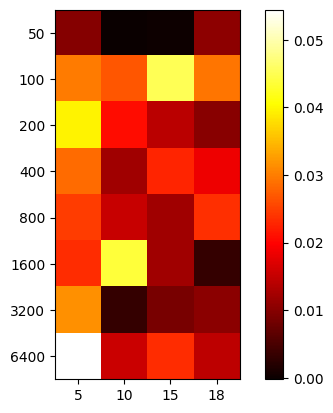

In [13]:
pts = [50, 100, 200, 400, 800, 1600, 3200, 6400]  # number of points to experiment with
atrs = [5, 10, 15, 18]  # number of dimensions to experiment with
res_train = np.empty((len(pts), len(atrs)))  # matrix with the results
res_train[:] = np.nan
res_test = np.empty((len(pts), len(atrs)))  # matrix with the results
res_test[:] = np.nan
k = 1

for n in range(len(pts)):
    for m in range(len(atrs)):
        prec_train = []
        prec_test = []
        for i in range(50):  # for each dataset size (n rows, m columns) do five experiments and average the results
            sys.stdout.write('\r' + 'experiment' + ' ' + str(k) + '/' + str(len(pts)*len(atrs)))
            
            num_columns_to_select = atrs[m]  # Change this to the number of columns you need
            label_column = None
            
            data_temp = data.copy()
            label_column = data_temp['label']
            data_temp.drop('label', axis=1, inplace=True)

                # Select random columns
            selected_columns = random.sample(list(data_temp.columns), num_columns_to_select)

                # Create a new DataFrame with the selected columns
            data_temp = data_temp[selected_columns]
            data_temp.insert(loc=0, column='label', value=label_column)
            
                #sampeling a subset of the whole data set
            sample_train, sample_test = train_test_split(data_temp, test_size=pts[n], train_size=pts[n]*2, stratify=data_temp['label'])
        
            sample_train = pd.DataFrame(data=sample_train.values, columns=sample_train.columns)
            sample_test = pd.DataFrame(data=sample_test.values, columns=sample_test.columns)

            y = sample_train['label'].values
            sample_train.drop('label', axis=1, inplace=True)
            x = sample_train.values
            
            y_test = sample_test['label']
            sample_test.drop('label', axis=1, inplace=True)
            x_test = sample_test.values
            
            prim_alg = prim_dens.PRIMdens(x, y, alpha=0.1)
            prim_alg.fit()
            precisions = prim_alg.get_precisions()
            if len(precisions) <= 0:
                prec_train.append(0)
            else:
                prec_train.append(precisions[len(precisions)-1])
            boxes = prim_alg.get_boxes()
            if len(boxes) <= 0:
                prec_test.append(0)
            else:
                box = boxes[len(boxes) - 1]
                box = pd.DataFrame(box)
                prec_test.append(calculate_precision_test_data(box, x_test, y_test))           
        
        res_train[n, m] = np.mean(prec_train)
        res_test[n, m] = np.mean(prec_test) 
        k = k + 1

plt.imshow(res_train-res_test, cmap='hot')
plt.yticks(np.arange(len(pts)), pts)
plt.xticks(np.arange(len(atrs)), atrs)
plt.colorbar()
plt.show()

In [16]:
gz_file_path = '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/Data/HIGGS.csv.gz'

# Open the Gzip-compressed CSV file
with gzip.open(gz_file_path, 'rb') as gz_file:
    # Read the dataset into a DataFrame
    data = pd.read_csv(gz_file)

columns = ['label', 'lepton  pT', 'lepton  eta', 'lepton  phi', 'missing energy magnitude', 'missing energy phi', 'jet 1 pt', 'jet 1 eta', 'jet 1 phi', 'jet 1 b-tag', 'jet 2 pt', 'jet 2 eta', 'jet 2 phi', 'jet 2 b-tag', 'jet 3 pt', 'jet 3 eta', 'jet 3 phi', 'jet 3 b-tag', 'jet 4 pt', 'jet 4 eta', 'jet 4 phi', 'jet 4 b-tag', 'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']

scaler = MinMaxScaler()
data1 = data
data = scaler.fit_transform(data)
data = pd.DataFrame(data, index=data1.index, columns=columns)

print(data)

          label  lepton  pT  lepton  eta  lepton  phi  \
0           1.0    0.053521       0.5676     0.603005   
1           1.0    0.044328       0.8020     0.030563   
2           0.0    0.090466       0.3200     0.768393   
3           1.0    0.070221       0.5660     0.936646   
4           0.0    0.111732       0.3752     0.501925   
...         ...         ...          ...          ...   
10999994    1.0    0.074865       0.7082     0.531055   
10999995    1.0    0.029067       0.2920     0.818375   
10999996    1.0    0.036016       0.6590     0.936010   
10999997    0.0    0.076397       0.5242     0.133552   
10999998    0.0    0.016050       0.4308     0.565597   

          missing energy magnitude  missing energy phi  jet 1 pt  jet 1 eta  \
0                         0.097277            0.410339  0.097729   0.406135   
1                         0.029457            0.622153  0.098682   0.715905   
2                         0.129367            0.753154  0.168171   0.222741   

experiment 32/32

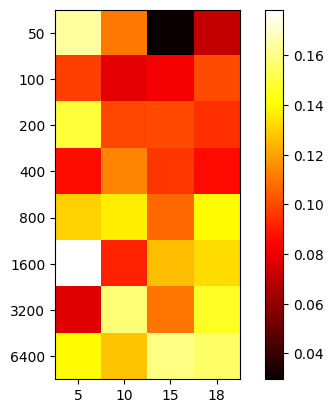

In [17]:
pts = [50, 100, 200, 400, 800, 1600, 3200, 6400]  # number of points to experiment with
atrs = [5, 10, 15, 18]  # number of dimensions to experiment with
res_train = np.empty((len(pts), len(atrs)))  # matrix with the results
res_train[:] = np.nan
res_test = np.empty((len(pts), len(atrs)))  # matrix with the results
res_test[:] = np.nan
k = 1

for n in range(len(pts)):
    for m in range(len(atrs)):
        prec_train = []
        prec_test = []
        for i in range(50):  # for each dataset size (n rows, m columns) do five experiments and average the results
            sys.stdout.write('\r' + 'experiment' + ' ' + str(k) + '/' + str(len(pts) * len(atrs)))

            num_columns_to_select = atrs[m]  # Change this to the number of columns you need
            label_column = None

            data_temp = data.copy()
            label_column = data_temp['label']
            data_temp.drop('label', axis=1, inplace=True)

            # Select random columns
            selected_columns = random.sample(list(data_temp.columns), num_columns_to_select)

            # Create a new DataFrame with the selected columns
            data_temp = data_temp[selected_columns]
            data_temp.insert(loc=0, column='label', value=label_column)

            #sampeling a subset of the whole data set
            sample_train, sample_test = train_test_split(data_temp, test_size=pts[n], train_size=pts[n] * 2, stratify=data_temp['label'])

            sample_train = pd.DataFrame(data=sample_train.values, columns=sample_train.columns)
            sample_test = pd.DataFrame(data=sample_test.values, columns=sample_test.columns)

            y = sample_train['label'].values
            sample_train.drop('label', axis=1, inplace=True)
            x = sample_train.values

            y_test = sample_test['label']
            sample_test.drop('label', axis=1, inplace=True)
            x_test = sample_test.values

            prim_alg = prim_dens.PRIMdens(x, y, alpha=0.1)
            prim_alg.fit()
            precisions = prim_alg.get_precisions()
            if len(precisions) <= 0:
                prec_train.append(0)
            else:
                prec_train.append(precisions[len(precisions) - 1])
            boxes = prim_alg.get_boxes()
            if len(boxes) <= 0:
                prec_test.append(0)
            else:
                box = boxes[len(boxes) - 1]
                box = pd.DataFrame(box)
                prec_test.append(calculate_precision_test_data(box, x_test, y_test))

        res_train[n, m] = np.mean(prec_train)
        res_test[n, m] = np.mean(prec_test)
        k = k + 1

plt.imshow(res_train - res_test, cmap='hot')
plt.yticks(np.arange(len(pts)), pts)
plt.xticks(np.arange(len(atrs)), atrs)
plt.colorbar()
plt.show()